# **Pravděpodobnost a statistika**
## **Druhý projekt - Bayesovské odhady a Regresní analýza**
#### Vypracoval: Pavel Heřmann (xherma34)

Knihovny

In [28]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns

# **Úloha 1 - Bayesovské odhady**
## **a) Konjugované apriorní a aposteriorní rozdělení, prediktivní rozdělení**

Předpokládáme, že počet připojení na internetovou síť za 1 ms je popsaný náhodnou veličinou s Poissonovým rozdělením s parametrem 𝜆, t.j. 𝑋~𝑃𝑜(𝜆). O parametru 𝜆 máme následující expertní odhad: každých 5 ms by mělo nastat 10 připojení. Pozorovali jsme připojení po dobu 100 ms. Pozorovaní o počtu připojení za každou 1 ms jsou uvedené v souboru measurements.csv ve sĺoupci „úloha_1 a)“. Vašim zadáním je z této expertní informace urči konjugované apriorní rozdělení k parametru Poissonova rozdělení a na základě pozorovaní určit aposteriorní rozdělení. Dále určete apriorní a aposteriorní prediktivní rozdělení pozorovaní.

### **1) Do jednoho obrázku vykreslíte apriorní a aposteriorní hustotu parametru Poissonova rozdělení lambda**
Ze zadání víme, že expertní odhad je: 10 připojení po 5ms. Dále víme, že se jedná o poissonovo rozdělení. Pomocí tabulky konjugovaných rozdělení lze získat informaci, že gama rozdělení je konjugované k poissionovu rozdělení a tudíž na získání apriorního a aposteriorního rozdělení bude využito právě gama rozdělení. Na získání parametrů alfa, beta pro gama rozdělení použijeme předpis z tabulky: alfa = počet výskytů (10), beta = interval (5ms)


Priprava dat:

In [29]:
#načtení dat z excelu do pandas dataframe
dfEx1 = pd.read_excel('Projekt-2_Data.xlsx')

#získání prvního sloupce z dataframu
ex1data = dfEx1["uloha_1 a)"]

#vyhozeni radku, ktere jsou NaN
ex1data = ex1data[ex1data.notna()]

#data pro vypocty
sum = ex1data.sum()
n = ex1data.count()

#parametry gama rozdeleni
alpha = 10
beta = 5 


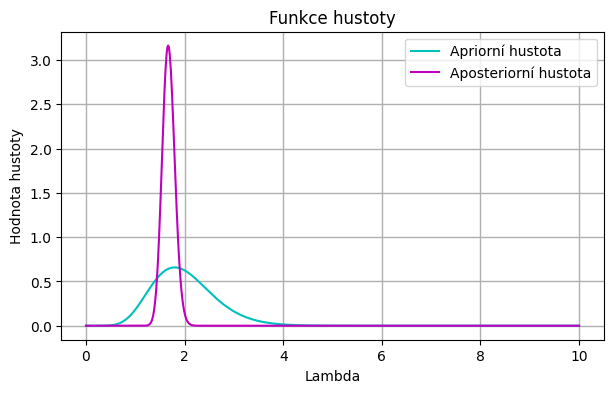

In [30]:
#vypocet apriorni a aposteriorni hustoty:
#apriorní
priorDensity = stats.gamma(alpha, scale=1/beta)

#aposteriorni
#uprava parametru pro vypocet aposteriorni hustoty
alphaPost = alpha + sum
betaPost = beta + n
postDensity = stats.gamma(alphaPost, scale=1/betaPost)

#hodnoty x
x = np.linspace(0, 10, 1000)

#vykresleni grafu
plt.figure(figsize=(7, 4))
plt.plot(x, priorDensity.pdf(x), label="Apriorní hustota", color='c')
plt.plot(x, postDensity.pdf(x), label="Aposteriorní hustota", color='m')
plt.legend()
plt.xlabel("Lambda")
plt.ylabel("Hodnota hustoty")
plt.title("Funkce hustoty")
plt.grid(linewidth=1)

### **2) Do jednoho obrázku vykreslíte apriorní a aposteriorní prediktivní hustotou pozorovaní x za jeden časový interval.**

Negativní binomické rozdělení je dle tabulky konjugované k poissonovu, k výpočtu aposteriorní prediktivní hustoty je třeba tedy použít právě to. Otázkou zůstává co je apriorní prediktivní rozdělení? Dle internetu je to rozdělení pravděpodobnosti počtu pozorování, tudíž pouhé poissonovo rozdělení pravděpodobnosti.

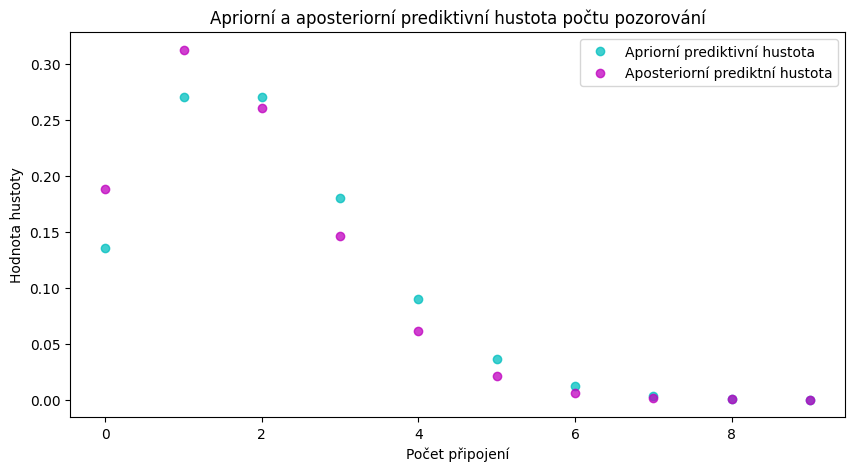

In [31]:
#apriorní prediktivní hustota
mean = ex1data.mean()
priorPred = stats.poisson(priorDensity.mean())

#aposteriorní prediktivní hustota pomocí neg. binomického rozdělení
#ziskani parametru pro neg. binomicke rozdeleni viz wiki
alphaNbin = alpha+sum
betaNbin = beta+n
postPred = stats.nbinom(alphaNbin, betaNbin/(1+betaNbin))

#ziskani x-hodnot
x = np.arange(ex1data.min(), ex1data.max()*2)

#graf
plt.figure(figsize=(10, 5))
plt.plot(x, priorPred.pmf(x), label="Apriorní prediktivní hustota", color='c', marker='o', linestyle="none", alpha=0.75)
plt.plot(x, postPred.pmf(x), label="Aposteriorní prediktní hustota", color='m', marker='o', linestyle="none", alpha=0.75)
plt.legend()
plt.xlabel("Počet připojení")
plt.ylabel("Hodnota hustoty")
plt.title("Apriorní a aposteriorní prediktivní hustota počtu pozorování")
plt.show()


### **3) Sestrojte 95% interval spolehlivosti pro parametr lambda z apriorního a aposteriorního rozdělení a porovnejte je.**

In [32]:
priorInt = priorDensity.interval(0.95)
priorIntLower = priorInt[0]
priorIntUpper = priorInt[1]

postInt = postDensity.interval(0.95)
postIntLower = postInt[0]
postIntUpper = postInt[1]

print("95% interval spolehlivosti parametru lambda z apriorního rozdělení: ({:.4f}, {:.4f})".format(priorIntLower, priorIntUpper))
print("95% interval spolehlivosti parametru lambda z aposteriorního rozdělení: ({:.4f}, {:.4f})".format(postIntLower, postIntUpper))

95% interval spolehlivosti parametru lambda z apriorního rozdělení: (0.9591, 3.4170)
95% interval spolehlivosti parametru lambda z aposteriorního rozdělení: (1.4377, 1.9327)


### **4) Vyberte si dva aposteriorní bodové odhady parametru lambda, porovnejte je a okomentujte jejich výběr.**

Pro bodové odhady parametru lambda byla vybrána střední hodnotu a medián. Střední hodnota jakožto odhad parametru je využívána většinou při souboru s hodně prvky a tedy lze ji považovat za dobrý odhad. Medián oproti střední hodnotě lépe vizualizuje odhad v případě, kdy v souboru máme nějaké velmi extrémní rozdíly mezi prvky. Z výstupu níže lze vidět, že oba odhady vyšly velice podobně a liší se až v tisícinách, to naznačuje že je naše rozdělení vesměs symetrické. Dále můžeme říci, že se nevyskytují nějak extremní hodnoty v souboru, protože jinak by střední hodnota vyšla jinak jako medián a více by odhad zkreslovala.

In [33]:
print("Bodový odhad parametru lambda z aposteriorního rozdělení pomocí střední hodnoty: {:.4f}".format(postDensity.mean()))
print("Bodový odhad parametru lambda z aposteriorního rozdělení pomocí mediánu: {:.4f}".format(postDensity.median()))

Bodový odhad parametru lambda z aposteriorního rozdělení pomocí střední hodnoty: 1.6762
Bodový odhad parametru lambda z aposteriorního rozdělení pomocí mediánu: 1.6730


### **5) Vyberte si jeden apriorní a jeden aposteriorní bodový odhad počtu pozorovaní a porovnejte je.**

Pro bodové odhady počtu pozorování byla opět vybrána střední hodnoty. Apriorní odhad vychází 2, což přesně odpovídá hodnotě ze zadání, při normalizaci parametrů alpha a beta na 1ms vychází přesně 2 pozorování, nebo-li přesně zadanému expertnímu odhadu. Aposteriorní odhad vychází jako cca 1.67, který se je vůči apriornímu odhadu nižší, hodnota je totiž tvořena z již "skutečně" naměřených dat. Nižší aposteriorní odhad tedy naznačuje, že počet pozorování je nižší, než bylo poředpokládáno.

In [34]:
print("Bodový odhad počtu pozorování z apriorního rozdělení pomocí střední hodnoty: {:.4f}".format(priorPred.mean()))
print("Bodový odhad počtu pozorování z aposteriorního rozdělení pomocí střední hodnoty: {:.4f}".format(postPred.mean()))

Bodový odhad počtu pozorování z apriorního rozdělení pomocí střední hodnoty: 2.0000
Bodový odhad počtu pozorování z aposteriorního rozdělení pomocí střední hodnoty: 1.6762


## **b) Aproximace diskrétním rozdělením**
Zadání:

Víme, že délka zpracování procesu v milisekundách ms má odseknuté normální rozdělení (truncated normal distribution)
viz.: https://en.wikipedia.org/wiki/Truncated_normal_distribution s parametry 𝜇=3,𝜎2=1,𝑎=1 Naší úlohou je odhadnout parametr 𝑏, t.j. maximální dobu trvání procesu. Máme historické záznamy o jeho délce trvání (sloupec „uloha 1 a)_prior“) na počítačích podobné výkonové řady. Provedli jsme sérii pozorovaní po 10, číslo série pozorovaní v tabulce v sloupci „skupina“. Z těchto záznamů vyjádříte apriorní informaci o parametru 𝑏. Ve sloupci „uloha_1 b)_pozorovania“ jsou naše pozorování délky trvání procesu Vyjádřete funkci věrohodnosti (sloupec „uloha_1 b)_pozorovania“) (v tomto případe také jen její diskrétní aproximace) a následně diskrétní aposteriorní hustotu.

### **1) Do jednoho grafu vykreslíte apriorní, aposteriorní hustotou a funkci věrohodnosti. Funkci věrohodnosti normujte tak, aby jej součet byl 1 kvůli porovnatelnosti v obrázku.**


Před výpočtem je nutno data upravit tak, abychom mohli docílit diskrétního výstupu. K tomu je využito metody "binning". Z datové sady se nejdříve vyberou reprezentanti pro každou skupinu, tento reprezentant je vždy maximum ze skupiny, následně jsou tyto hodnoty transformovány na intervaly, kde získáváme výše zmíněné "koše". Z těchto intervalů se vybere reprezentant a to přesněji střed intervalu. Pro každou z těchto hodnot je následně vypočítána pravděpodobnost, tím je získáná apriorní hustota. 

Další v pořadí je věrohodnostní funkce. Ta je vypočítána pomocí "zkráceného" normálního rozdělení (truncated normal distribution). Tímto je získáno pravděpodobností pro jednotlivé hodnoty parametru b. Tyto hodnoty jsou velice nízké a proto jsou ještě na konci normalizovány do tvaru, kde součet = 1.

Poslední je aposteriorní hustota pomocí vzorce h(b)*p(x|b)/(sum(h(b)*p(x|b))), kde h(b) je apriorní hustota a p(x|b) je věrohodnostní funkce.

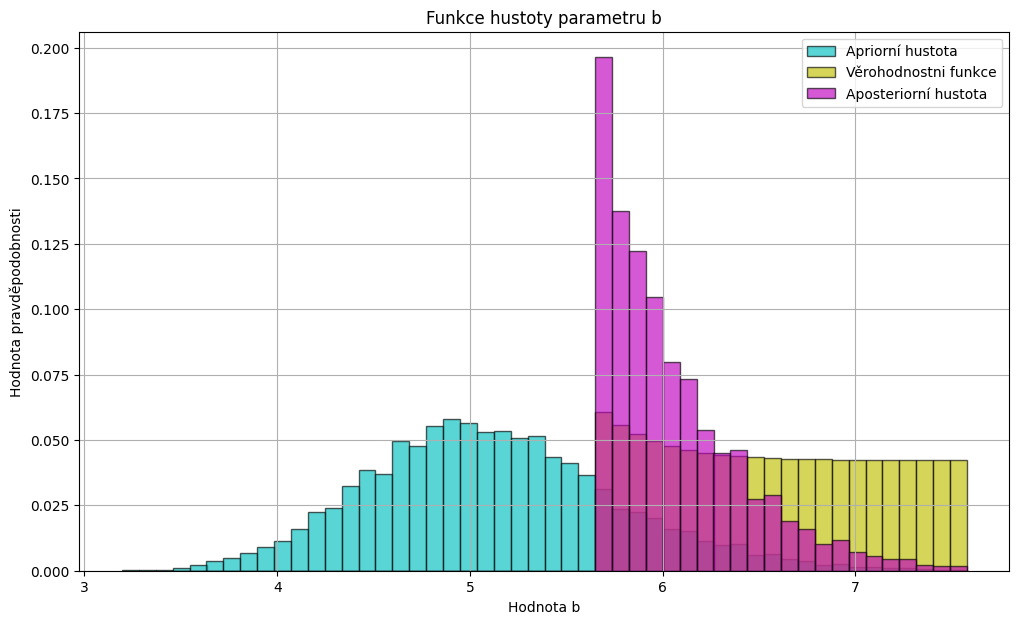

In [35]:
#Apriorni vypocet
#ziskani potrebnych sloupcu
ex2data = dfEx1[["uloha_1 b)_prior", "skupina", "uloha_1 b)_pozorování"]]

#vytvoreni noveho dataframu kde se z kazde skupiny vybere maximum
grouped = ex2data.groupby("skupina")
priorData = grouped["uloha_1 b)_prior"].max().reset_index()

#rozdeleni na intervaly
intervals = pd.cut(priorData["uloha_1 b)_prior"], bins=50)

#ziskani dataframu obsahujici stredy intervalu
midPoints = []
for interval in intervals:
	mid = interval.mid
	midPoints.append(mid)

#vytvoreni dataframu ktery obsahuje sloupec midpoint a sloupec pocet vyskytu
midPointsUni = pd.DataFrame(np.unique(midPoints, return_counts=True)).T
midPointsUni.columns = ["midpoint" , "count"]

#vypocet pravdepodobnosti pro jednotlive intervaly
intProb = midPointsUni["count"] / len(midPoints)

#dataframe pro udrzeni vsech vypocitanych dat
finalData = pd.DataFrame({"b":midPointsUni["midpoint"], "prior": intProb})

#Verohodnostni funkce
#vyhozeni radku, ktere jsou NaN
occurences = ex2data["uloha_1 b)_pozorování"].dropna()
# print(occurences)
#ulozeni promennych ze zadani
mean = 3
std = 1
a = 1

postProbs = []
for b in finalData["b"]:
	val = 1
	for x in occurences:
		anew, bnew = (a - mean) / std, (b - mean) / std
		prob = stats.truncnorm.pdf(x, anew, bnew, loc=mean, scale=std)
		val *= prob
	postProbs.append(val)

postProbs = pd.DataFrame(postProbs)

#normalizace
finalData["likelihood"] = postProbs/postProbs.sum()

#aposteriorni
#vypocitano jako h(b)*p(x|b)/(sum(h(b)*p(x|b)))
#vypocet sumy
sum = 0
for i in range(len(finalData)):
	sum += finalData["prior"][i]*finalData["likelihood"][i]

#finalni vypocet h(b)*p(x|b)/(sum(h(b)*p(x|b)))
finalData["posterior"] = (finalData["prior"]*finalData["likelihood"])/sum

#vypocet velikosti intervalu na graf
intSize = intervals[0].right - intervals[0].left

#vykresleni grafu
plt.figure(figsize=(12, 7))
plt.bar(finalData["b"], finalData["prior"], label="Apriorní hustota", color='c', alpha=0.65, width=intSize, linewidth=1, edgecolor='k')
plt.bar(finalData["b"], finalData["likelihood"], label="Věrohodnostni funkce", color='y', alpha=0.65, width=intSize, linewidth=1, edgecolor='k')
plt.bar(finalData["b"], finalData["posterior"], label="Aposteriorní hustota", color='m', alpha=0.65, width=intSize, linewidth=1, edgecolor='k')
plt.legend()
plt.xlabel("Hodnota b")
plt.ylabel("Hodnota pravděpodobnosti")
plt.title("Funkce hustoty parametru b")
plt.grid()
plt.show()

### **2) Z aposteriorní hustoty určete 95% interval spolehlivosti (konfidenční interval) pro parametr 𝑏.**

In [36]:
#nejdrive by se mely vzorky seradit, ovsem serazeny uz jsou
#vypocet kumulativní dis. fce
cumDis = finalData["posterior"].cumsum()

#funkce vraci index prvniho vyskytu hodnoty value v promenne array
def findIndexOf(value, arr):
	for id, val in enumerate(arr):
		if(val >= value):
			return id

minId = findIndexOf(0.025, cumDis)
maxId = findIndexOf(0.975, cumDis)

#ziskani samotnych indexu pro kumulativni dis. fci
minId = next((i for i, val in enumerate(cumDis) if val >= 0.025), None)
maxId = next((i for i, val in enumerate(cumDis) if val >= 0.975), None)

#spodni a horni hranice
lowerBound = finalData["b"][minId]
upperBound = finalData["b"][maxId]


#vypis
print("95% interval spolehlivosti z aposteriorní hustoty je: ({:.4f}, {:.4f})".format(lowerBound, upperBound))

95% interval spolehlivosti z aposteriorní hustoty je: (5.6940, 7.0090)


### **3) Vyberte dva bodové odhady parametru 𝑏 a spočítejte je.**

Pro bodový odhad bylo opět vybráno použití střední hodnoty a mediánu, kde střední hodnota je počítána jako vážený průměr, kde váha je aposteriorní hodnota hustoty.

In [37]:
#vazeny prumer
mean = np.average(finalData["b"], weights=finalData["posterior"])
print("Bodový odhad parametru b pomocí střední hodnoty: {:.4f}".format(mean))

#median
medianId = next((i for i, val in enumerate(cumDis) if val >= 0.5), None)
median = finalData["b"][medianId]
print("Bodový odhad parametru b pomocí mediánu: {:.4f}".format(median))

Bodový odhad parametru b pomocí střední hodnoty: 6.0529
Bodový odhad parametru b pomocí mediánu: 5.9570


# **Úloha 2 - Regrese**
zadání:

Podařilo se Vám pomocí stroje času vrátit do doby „zlatého věku“ sociálních sítí a rozhodli jste se konkurovat Facebooku a Twitteru. V souboru Data_v1.0.csv máte k dispozici záznamy od více než 500 uživatelů o rychlosti odezvy (sloupec ping [ms]) během používání Vaší aplikace. Ke každému zápisu máte navíc k dispozici o počtu uživatelů (sloupec ActiveUsers) v daném okamžiku, o procentu uživatelů, kteří momentálně interagují s prezentovaným obsahem (sloupec InteractingPct), o procentu uživatelů, kteří jen tupě scrollují po Vaší obdobě timeline/twitterfeedu (sloupec ScrollingPct) a o operačním systému zařízení ze kterého se uživatel připojil (OSType).

### **1) Pomocí zpětné eliminace určete vhodný regresní model. Za výchozí „plný“ model považujte plný kvadratický model (všechny interakce druhého řádu a všechny druhé mocniny, které dávají smysl).**

Nejdříve lze použít one-hot kódování kvůli multikolinearitě proměnných typu OSType. Následně lze vyřadit i proměnnou InteractingPct protože se s proměnnou ScrollingPct doplňuje do 1, tudíž je mezi nimi závislost. Dále je provedena standardizace dat pro sloupce ActiveUsers a ScrollingPct. Následně je konečně provedena zpětná eliminace při které se díváme na to, která z proměnných ve vzorci má p-hodnotu vyšší než 0.5, ty odstraňujeme.

In [38]:
#načtení dat
data = pd.read_excel("Projekt-2_Data.xlsx", sheet_name="Úloha 2")

#one-hot zakódování kvůli multikolinearitě
data['win'] = (data['OSType'] == 'Windows').astype(int)
data['mac'] = (data['OSType'] == 'MacOS').astype(int)
data['an'] = (data['OSType'] == 'Android').astype(int)

#odstraneni InteractingPct(doplnuje se vzajeme s ScrollingPct do 1) a OSType po prevedeni nahore
data.drop("InteractingPct", inplace=True, axis=1)
data.drop("OSType", inplace=True, axis=1)

#prejmenovani sloupcu kvuli zjednoduseni do nasledneho zasazeni do vzorce
colNames = {"ActiveUsers":"actUsrs", "ScrollingPct" : "scPct", "Ping [ms]" : "pg"}
data.rename(columns=colNames, inplace=True)

#standardizace
dataStd = data.copy()
dataStd["actUsrs"] = (data["actUsrs"] - data["actUsrs"].mean()) / data["actUsrs"].std(ddof=0)
dataStd["scPct"] = (data["scPct"] - data["scPct"].mean()) / data["scPct"].std(ddof=0)

#vytvoreni vzorce
formula = 'pg ~ actUsrs + scPct + win + mac + an + actUsrs:scPct + actUsrs:win + actUsrs:mac + actUsrs:an + scPct:win + scPct:mac + scPct:an + I(actUsrs ** 2) + I(scPct ** 2)'


def removeFromFormula(formula, str):
	if str in formula:
		if " + " + str in formula:
			return formula.replace(" + " + str , "")
		return formula.replace(str, "")

#zpetna eliminace
while True:
	model = smf.ols(formula=formula, data=dataStd).fit()
	pVals = model.pvalues.drop("Intercept")
	if pVals.max() > 0.05:
		strToRemove = pVals.idxmax()
		formula = removeFromFormula(formula, strToRemove)
	else:
		break

#vytvoreni modelu po zpetne eliminaci
model = smf.ols(formula=formula, data=dataStd)

#vysledky z modelu
modelRes = model.fit()

#ziskani koeficientu pro vypis
coef = modelRes.params
# print(coef)



Před vypsáním rovnice je dobré provést VIF analýzu, která přiřazuje proměnným hodnotu. Pokud tato hodnota je blízká nebo vyšší, než 10 ukazuje, že se v modelu vyskytuje multikolinearita.

In [39]:
#odstranění korelovaných proměnných pomocí VIF analýzy

#získání exogenních proměnných
X = pd.DataFrame(model.exog, columns=model.exog_names)

#vypocet Vif
vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
vifDf = vif.to_frame()
vifDf.columns = ['VIF']
print(vifDf)

                      VIF
Intercept        5.550769
actUsrs          1.929304
scPct            1.013519
win              1.573735
mac              1.591598
an               1.534274
actUsrs:scPct    1.016595
actUsrs:mac      1.527704
actUsrs:an       1.416742
I(actUsrs ** 2)  1.013961


Z výsledků nahoře lze vidět, že žádná z proměnných nepřekračuje hodnotu VIF přes 10, tudíž nedochází k multikolinearitě

- Zapište rovnici Vašeho finálního modelu

In [40]:
auc = "{:.3f}*actUsrs".format(coef["actUsrs"])
spc = "{:.3f}*scPct".format(coef["scPct"])
wc = "{:.3f}*win".format(coef["win"])
mc = "{:.3f}*mac".format(coef["mac"])
ac = "{:.3f}*an".format(coef["an"])
auspc = "{:.3f}*actUsrs:scPct".format(coef["actUsrs:scPct"])
aumc = "{:.3f}*actUsrs:mac".format(coef["actUsrs:mac"])
auac = "{:.3f}*actUsrs:an".format(coef["actUsrs:an"])
aupow2 = "{:.3f}*I(actUsrs ** 2)".format(coef["I(actUsrs ** 2)"])
equation = "Ping = {:.3f} + {} + {} + {} + {} + {} + {} + {} + {} + {}".format(
	coef["Intercept"],auc,spc,wc,mc,ac,auspc,aumc,auac,aupow2)
print(equation)

Ping = 45.269 + 7.778*actUsrs + -5.044*scPct + 9.587*win + 15.126*mac + 5.714*an + 2.314*actUsrs:scPct + 5.841*actUsrs:mac + 2.223*actUsrs:an + -2.678*I(actUsrs ** 2)


- **Diskutujte splnění předpokladů lineární regrese a základní regresní diagnostiky.**
Před diskutováním lze vykreslit grafy, na kterých lze ukázat splnění předpokladů.

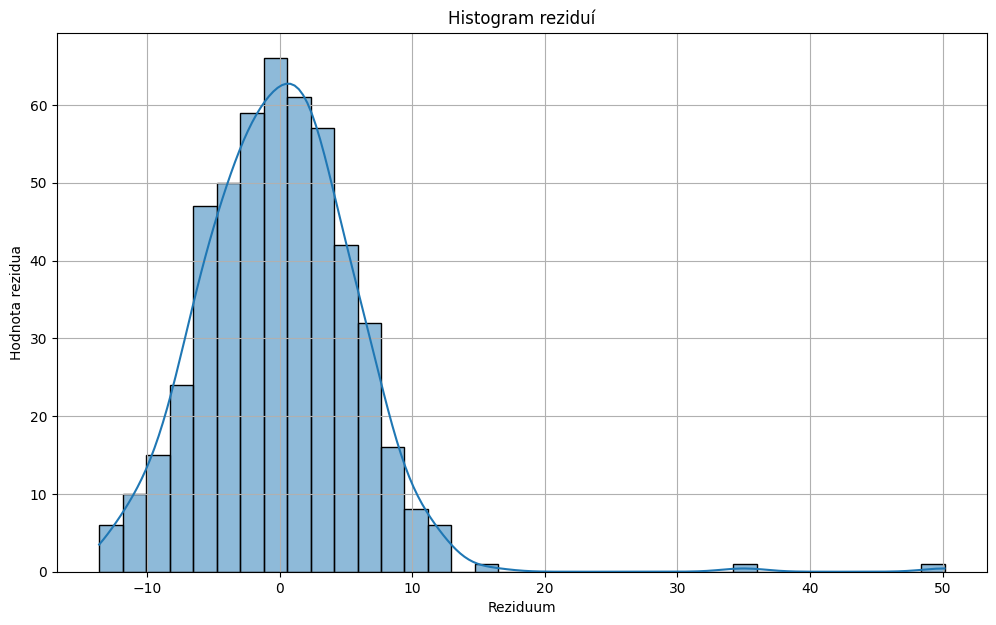

In [41]:
#histogram rezidui
residuals = modelRes.resid
plt.figure(figsize=(12, 7))
sns.histplot(residuals, kde=True)
plt.xlabel("Reziduum")
plt.ylabel("Hodnota rezidua")
plt.title("Histogram reziduí")
plt.grid()
plt.show()


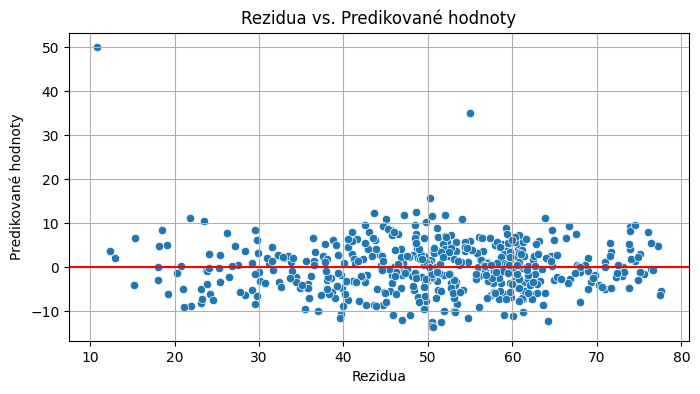

In [42]:
#Rezidua vůči predikovan=zm hodnotám
plt.figure(figsize=(8, 4))
sns.scatterplot(x=modelRes.fittedvalues, y=residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Rezidua")
plt.ylabel("Predikované hodnoty")
plt.title("Rezidua vs. Predikované hodnoty")
plt.grid()
plt.show()

Text(0, 0.5, 'Rezidua')

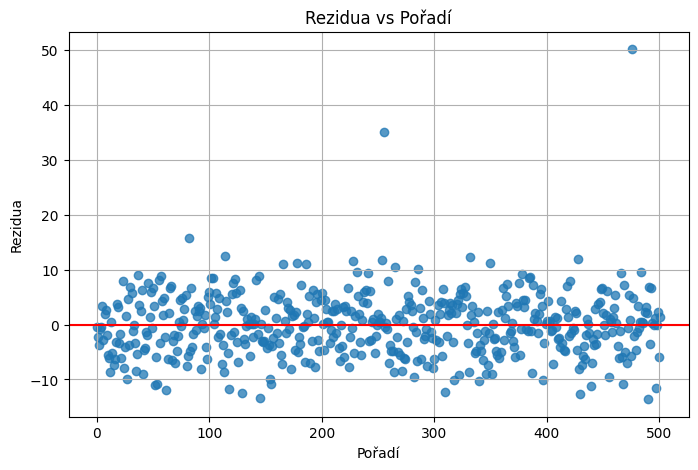

In [43]:
#Rezidua vs. pořadí
plt.figure(figsize=(8, 5))
plt.scatter(range(len(residuals)), modelRes.resid, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='-') 
plt.grid()
plt.title("Rezidua vs Pořadí")
plt.xlabel("Pořadí")
plt.ylabel("Rezidua")

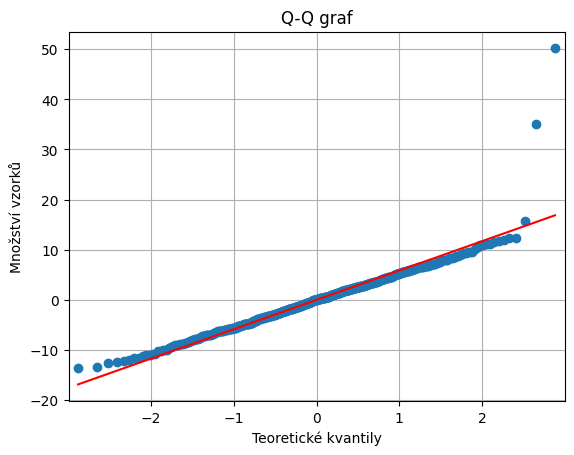

In [44]:
#qq graf
#q-q plot
sm.qqplot(residuals, line='s')
plt.xlabel("Teoretické kvantily")
plt.ylabel("Množství vzorků")
plt.title('Q-Q graf')
plt.grid(True)
plt.show()

In [45]:
#výpis hodnot modelu
print(modelRes.summary())

                            OLS Regression Results                            
Dep. Variable:                     pg   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     293.7
Date:                Thu, 14 Dec 2023   Prob (F-statistic):          1.62e-191
Time:                        11:48:35   Log-Likelihood:                -1599.6
No. Observations:                 502   AIC:                             3219.
Df Residuals:                     492   BIC:                             3261.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          45.2691      0.622     

Z histogramu reziduí lze vidět, že je symetrický kolem nuly, což je dobře. Lze ovšem v grafu vidět několik odlehlých hodnot obvzláště s vysokou hodnotou na ose Y.
Z grafu rezidua vs. předpokládané hodnoty lze získat informacu o tom, že nedochází k žádnému tvoření "vzorů", což naznačuje, že rezidua mají konstantí rozptyl (homoskedasticita).
QQ graf ukazuje, že rezidua dodržují přímku naznačující normální rozdělení. Napravo se ovšem opět ukazují některé odlehlé hodnoty, které přímku úplně nekopírují. 

Dále z tabulky lze vyhodnotit hodnotu R-squared 0.843 jako velice kladnou. Takto vysoká R-squared hodnota naznačuje, že je pokryto vysvětlení variance závislé proměnné ve výši 84,3%.
Podmíněné číslo 7,47 naznačuje, že model neobsahuje problémy s multikolinearitou
Hodnota Durbin-Watsonovy statistiky je schopná ukázat, zda se vyskytuje autokorelace reziduí. Výsledná hodnota tohoto modelu je 1,925. Hodnoty blížící se 2 u této statistiky nenaznačují autokorelaci.
Výše provedenou VIF analýzou lze konstatovat, že nedochází k vysoké multikolinearitě mezi proměnnými.
K lepším závěrům lze dojít pomocí odstranění odlehlých hodnot.

Z tohoto lze udělat závěr, že po odstranění odlehlých hodnot model splňuje předpoklady.

In [46]:
#odstraneni odlehlych hodnot
influence = modelRes.get_influence()
# Leverage 
leverage = influence.hat_matrix_diag
# Cookovy D hodnoty (a p-hodnoty) jako n-tice polí [n x 2]
cooks_d = influence.cooks_distance
# Standardizovaná rezidua
standardized_residuals = influence.resid_studentized_internal
# Studentizovaná rezidua
studentized_residuals = influence.resid_studentized_external
#tabulka dohromady dořešit změny počtu řádků
outl_stats_df = pd.DataFrame({
    'Leverage': leverage,
    'Standardized Residuals': standardized_residuals,
    'Studentized Residuals': studentized_residuals,
    'Cook\'s Distance': cooks_d[0],
    'Cook\'s Distance_p-value': cooks_d[1]
}, index=data.index)

outl_stats_df = dataStd.join(outl_stats_df)
outl_stats_df = outl_stats_df[(outl_stats_df['Leverage'] <= 3*len(modelRes.params)/data.shape[0]) & 
							  (np.abs(outl_stats_df['Standardized Residuals']) <= 2) & 
							  (outl_stats_df['Cook\'s Distance_p-value'] >= 0.05)]
# print(outl_stats_df)
newModel = smf.ols(formula=formula, data=outl_stats_df)
newModelRes = newModel.fit()
print(newModelRes.summary())


                            OLS Regression Results                            
Dep. Variable:                     pg   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     440.8
Date:                Thu, 14 Dec 2023   Prob (F-statistic):          4.27e-225
Time:                        11:48:36   Log-Likelihood:                -1462.3
No. Observations:                 488   AIC:                             2945.
Df Residuals:                     478   BIC:                             2987.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          45.7439      0.524     

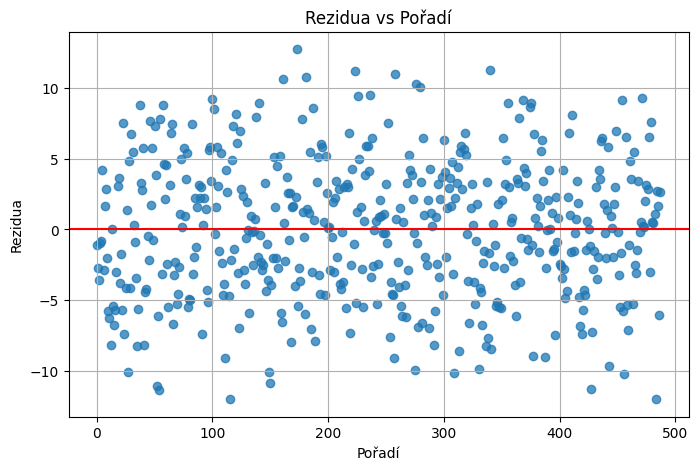

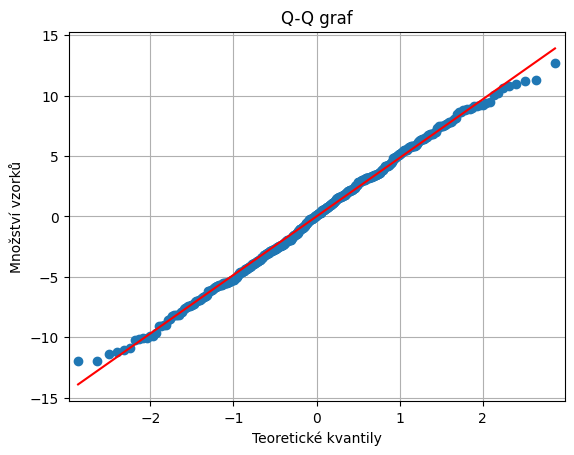

In [47]:
#Zmeny v grafu po odstraneni odlehlych hodnot
#Rezidua vs. pořadí AFTER
newResiduals = newModelRes.resid
plt.figure(figsize=(8, 5))
plt.scatter(range(len(newResiduals)), newResiduals, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='-') 
plt.grid()
plt.title("Rezidua vs Pořadí")
plt.xlabel("Pořadí")
plt.ylabel("Rezidua")

#QQ graf AFTER
#qq graf
#q-q plot
sm.qqplot(newResiduals, line='s')
plt.xlabel("Teoretické kvantily")
plt.ylabel("Množství vzorků")
plt.title('Q-Q graf')
plt.grid(True)
plt.show()

Hodnota R-squared se zvedla z 0.843 na 0.892, což znamená, že model vysvětluje větší procento variability proměnné ping, f-statistika ukazuje, že po odstranění odlehlých hodnot je model statisticky významnější. Durbin-Watsonova statistika o něco málo klesla, přesněji na 1,880, stále nevykazuje vysokou autokorelaci.

V grafech jde vidět rozdíl o dost více, v grafu reziduí lze pozorovat, že jsou data více rozprostřena a rezidua nevyskakují vysoko na ose y. QQ-graf ukazuje, že až na začátek a konec rezidua kopírují normální rozdělení o dost lépe, než v předchozím grafu.

### **2) Pomocí Vašeho výsledného modelu identifikujte, pro které nastavení parametrů má odezva nejproblematičtější hodnotu.**

Nejvlivnější parametr na dobu odezvy (ping) je m, který má nejvyšší hodnotu koeficientu (15,1263). Následuje druhý nejvyšší koeficient a to je pro parametr win (9,5869), opět dochází k tomu, že tato proměná má razantní vliv na hodnotu odezvy (ping).
Koeficient parametru scrollingPct vyšel negativně (-5,0443), což by normálně naznačovalo, že má pozitivní vliv na dobu odezvy (ping). Z hodnoty koeficientu activeUsers:mac lze vyvodit, že kombinací vysokého počtu uživatelů a vysokého počtu uživatelů macOS povede ke zvýšení doby odezvy.

Nejproblematičtější hodnotou tedy rozhodně bude parametr m (macOS), který dosahuje koeficientu 15,1263. Zároveň je pozoruhodná hodnota scrollingPct, která vyšla negativně, mělo by to znamenat pozitivní vliv na dobu odezvy, ale jelikož je to hodnota závislá na hodnote interactivePct, kterou jsme před tvořením modelu odstranili, nelze tento závěr udělat.

### **3) Odhadněte hodnotu odezvy uživatele s Windows, při průměrném nastavení ostatních parametrů a vypočtěte konfidenční interval a predikční interval pro toto nastavení.**

In [48]:
actUsrsMean = dataStd["actUsrs"].mean()
scPctMean = dataStd["scPct"].mean()
actUsrsMeanPow2 = actUsrsMean**2
actUsrsScPct = actUsrsMean*scPctMean

winMeanData = pd.DataFrame({"actUsrs":[actUsrsMean], "scPct":[scPctMean], "win":[1], 
							"mac":[0], "an":[0], "actUsrs:scPct":[actUsrsScPct], 
							"actUsrs:mac":[0], "actUsrs:an":[0], 
							"I(actUsrs ** 2)":actUsrsMeanPow2})

pred = modelRes.get_prediction(winMeanData)
predRes = pred.summary_frame(alpha=0.05)

predValue = predRes["mean"].values[0]
# print(predValue)
print("Odhad hodnoty odezvy uživatele s Windows při průměrném nastavení ost. parametrů: {:.4f}".format(predValue))

lowerBound = predRes["mean_ci_lower"].values[0]
upperBound = predRes["mean_ci_upper"].values[0]
print("Konfidenční interval tohoto nastavení: ({:.4f},{:.4f})".format(lowerBound, upperBound))

lowerBound = predRes["obs_ci_lower"].values[0]
upperBound = predRes["obs_ci_upper"].values[0]
print("Predikční interval tohoto nastavení: ({:.4f},{:.4f})".format(lowerBound, upperBound))

Odhad hodnoty odezvy uživatele s Windows při průměrném nastavení ost. parametrů: 54.8560
Konfidenční interval tohoto nastavení: (53.6953,56.0168)
Predikční interval tohoto nastavení: (43.1751,66.5370)


### **4) Na základě jakýchkoli vypočtených charakteristik argumentujte, zdali je Váš model „vhodný“ pro další použití.**

Model vykazuje vysokou vysvětlující sílu, nízká hodnota f-statistiky ukazuje silnou lineární vazbu mezi prediktory a závislou proměnnou. QQ graf vykazuje minimální odchylky v počátku a konci přímky, což nijak neukazuje nevhodnost modelu, všechny koeficienty jsou statisticky významné.

Omnibus a Jarque-Bera ukazuje menší odchylku od norm. rozdělení, ale nejsou natolik vysoké, aby model znehodnotily, kondiční číslo je velice nízké, takže nejsou problémy ani s multikolinearitou.

Tím že model vykazuje tyto hodnoty charakteristik, lze jej považovat jako vhodný pro další použití.